In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

pd.set_option('display.max_columns', None)
sns.set_theme(style="darkgrid")

In [2]:
df = pd.read_excel('./Data/Data_Cortex_Nuclear.xls')
df.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.022060,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.453910,3.037621,0.369510,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,0.394721,0.339571,0.482864,0.294170,0.182150,0.842725,0.192608,1.443091,0.294700,0.354605,1.339070,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.125190,0.115291,0.228043,0.142756,0.430957,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,0.299051,0.385987,0.281319,0.956676,0.587559,1.725774,2.043037,0.445222,0.834659,0.400364,0.356178,0.173680,1.761047,3.485287,1.509249,0.255727,0.304419,0.780504,0.157194,0.430940,2.921882,0.342279,0.423560,0.324835,0.761718,0.545097,0.420876,0.545097,0.368255,0.321959,0.454519,0.276431,0.182086,0.847615,0.194815,1.439460,0.294060,0.354548,1.306323,0.171427,0.158129,0.184570,0.106592,0.150471,0.178309,0.134275,0.118235,0.238073,0.142037,0.457156,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.677348,0.291276,0.381002,0.281710,1.003635,0.602449,1.731873,2.017984,0.467668,0.814329,0.399847,0.368089,0.173905,1.765544,3.571456,1.501244,0.259614,0.311747,0.785154,0.160895,0.423187,2.944136,0.343696,0.425005,0.324852,0.757031,0.543620,0.404630,0.552994,0.363880,0.313086,0.447197,0.256648,0.184388,0.856166,0.200737,1.524364,0.301881,0.386087,1.279600,0.185456,0.148696,0.190532,0.108303,0.145330,0.176213,0.132560,0.117760,0.244817,0.142445,0.510472,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.583277,0.296729,0.377087,0.313832,0.875390,0.520293,1.566852,2.132754,0.477671,0.727705,0.385639,0.362970,0.179449,1.286277,2.970137,1.419710,0.259536,0.279218,0.734492,0.162210,0.410615,2.500204,0.344509,0.429211,0.330121,0.746980,0.546763,0.386860,0.547849,0.366771,0.328492,0.442650,0.398534,0.161768,0.760234,0.184169,1.612382,0.296382,0.290680,1.198765,0.159799,0.166112,0.185323,0.103184,0.140656,0.163804,0.123210,0.117439,0.234947,0.145068,0.430996,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.550960,0.286961,0.363502,0.277964,0.864912,0.507990,1.480059,2.013697,0.483416,0.687794,0.367531,0.355311,0.174836,1.324695,2.896334,1.359876,0.250705,0.273667,0.702699,0.154827,0.398550,2.456560,0.329126,0.408755,0.313415,0.691956,0.536860,0.360816,0.512824,0.351551,0.312206,0.419095,0.393447,0.160200,0.768113,0.185718,1.645807,0.296829,0.309345,1.206995,0.164650,0.

In [3]:
df.columns = df.columns.str.replace('_N' , '')
df.rename(columns = {'class':'Class'}, inplace = True)

In [4]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MouseID        1080 non-null   object 
 1   DYRK1A         1077 non-null   float64
 2   ITSN1          1077 non-null   float64
 3   BDNF           1077 non-null   float64
 4   NR1            1077 non-null   float64
 5   NR2A           1077 non-null   float64
 6   pAKT           1077 non-null   float64
 7   pBRAF          1077 non-null   float64
 8   pCAMKII        1077 non-null   float64
 9   pCREB          1077 non-null   float64
 10  pELK           1077 non-null   float64
 11  pERK           1077 non-null   float64
 12  pJNK           1077 non-null   float64
 13  PKCA           1077 non-null   float64
 14  pMEK           1077 non-null   float64
 15  pNR1           1077 non-null   float64
 16  pNR2A          1077 non-null   float64
 17  pNR2B          1077 non-null   float64
 18  pPKCAB  

In [5]:
df.describe()

,DYRK1A,ITSN1,BDNF,NR1,NR2A,pAKT,pBRAF,pCAMKII,pCREB,pELK,pERK,pJNK,PKCA,pMEK,pNR1,pNR2A,pNR2B,pPKCAB,pRSK,AKT,BRAF,CAMKII,CREB,ELK,ERK,GSK3B,JNK,MEK,TRKA,RSK,APP,Bcatenin,SOD1,MTOR,P38,pMTOR,DSCR1,AMPKA,NR2B,pNUMB,RAPTOR,TIAM1,pP70S6,NUMB,P70S6,pGSK3B,pPKCG,CDK5,S6,ADARB1,AcetylH3K9,RRP1,BAX,ARC,ERBB4,nNOS,Tau,GFAP,GluR3,GluR4,IL1B,P3525,pCASP9,PSD95,SNCA,Ubiquitin,pGSK3B_Tyr216,SHH,BAD,BCL2,pS6,pCFOS,SYP,H3AcK18,EGR1,H3MeK4,CaNA
count,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1062.000000,1077.000000,1077.000000,1077.000000,1073.000000,1077.000000,1077.000000,1077.000000,1062.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,867.000000,795.000000,1080.000000,1005.000000,1080.000000,900.000000,870.000000,810.000000,1080.000000
mean,0.425810,0.617102,0.319088,2.297269,3.843934,0.233168,0.181846,3.537109,0.212574,1.428682,0.545904,0.313505,0.317939,0.275033,0.825813,0.726933,1.561965,1.525338,0.442848,0.682236,0.378519,0.363357,0.180492,1.173400,2.474492,1.172603,0.241644,0.272789,0.693180,0.168417,0.404808,2.146550,0.542635,0.452459,0.415311,0.759047,0.585186,0.368370,0.565317,0.357095,0.315813,0.418605,0.394475,0.181080,0.943116,0.161211,1.706599,0.292434,0.429226,1.197420,0.216482,0.166631,0.179307,0.121521,0.156478,0.181300,0.210489,0.120889,0.221851,0.126560,0.527349,0.291276,1.548348,2.235236,0.159821,1.239270,0.848767,0.226676,0.157914,0.134762,0.121521,0.131053,0.446073,0.169609,0.183135,0.205440,1.337784
std,0.249362,0.251640,0.049383,0.347293,0.933100,0.041634,0.027042,1.295169,0.032587,0.466904,0.345309,0.051978,0.052236,0.046164,0.117969,0.188013,0.270737,0.481780,0.066672,0.127434,0.216388,0.052352,0.026370,0.335786,0.653397,0.244752,0.033901,0.041075,0.120825,0.028138,0.061173,0.435742,0.280568,0.065488,0.089290,0.122446,0.100601,0.062583,0.088201,0.063025,0.054163,0.067288,0.156170,0.029296,0.172838,0.019308,0.578442,0.037380,0.137440,0.361743,0.185309,0.031896,0.018826,0.014276,0.015071,0.024919,0.069010,0.013233,0.034886,0.026885,0.082057,0.030015,0.248132,0.254395,0.024150,0.173580,0.094311,0.028989,0.029537,0.027417,0.014276,0.023863,0.066432,0.059402,0.040406,0.055514,0.317126
min,0.145327,0.245359,0.115181,1.330831,1.737540,0.063236,0.064043,1.343998,0.112812,0.429032,0.149155,0.052110,0.191431,0.056818,0.500160,0.281285,0.301609,0.567840,0.095942,0.064421,0.143894,0.212960,0.113636,0.497695,1.131796,0.151124,0.046298,0.147201,0.198743,0.107394,0.235595,1.134886,0.217120,0.201143,0.227880,0.166579,0.155321,0.226409,0.184785,0.185598,0.194824,0.237777,0.131120,0.117999,0.344120,0.099976,0.598767,0.181157,0.130206,0.529108,0.052528,-0.062008,0.072326,0.067254,0.100217,0.099734,0.096233,0.086114,0.111382,0.072580,0.284001,0.207438,0.853176,1.206098,0.101233,0.750664,0.577397,0.155869,0.088305,0.080657,0.067254,0.085419,0.258626,0.079691,0.105537,0.101787,0.586479
25%,0.288121,0.473361,0.287444,2.057411,3.155678,0.205755,0.164595,2.479834,0.190823,1.203665,0.337405,0.281242,0.281829,0.244287,0.743491,0.590303,1.381288,1.168258,0.404144,0.596816,0.264334,0.330859,0.161830,0.944435,1.991756,1.023134,0.220400,0.247096,0.617074,0.149622,0.366339,1.826707,0.319639,0.410389,0.351992,0.683501,0.530881,0.326621,0.514892,0.312766,0.276127,0.371976,0.281090,0.159334,0.826742,0.149253,1.296830,0.272594,0.316684,0.930548,0.103571,0.149025,0.168172,0.110839,0.146969,0.166451,0.167991,0.112765,0.195665,0.108895,0.4

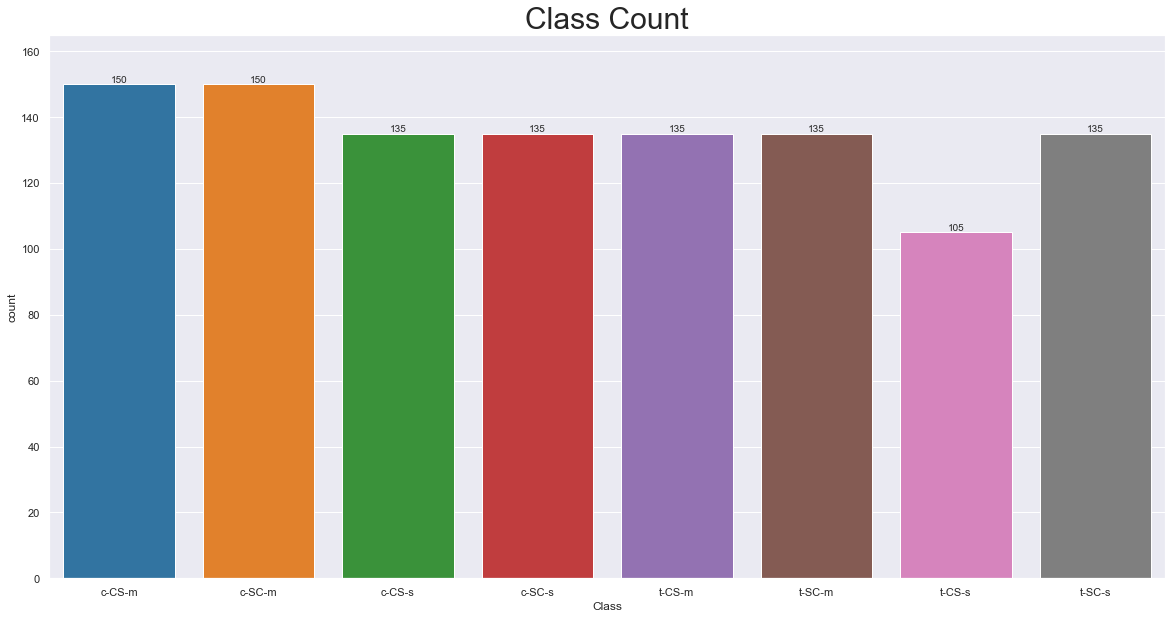

In [6]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.countplot(x='Class', data=df, ax=ax, palette="tab10")
ax.bar_label(ax.containers[0], label_type='edge')
ax.set_title('Class Count', fontsize=30)
ax.margins(y=0.1)

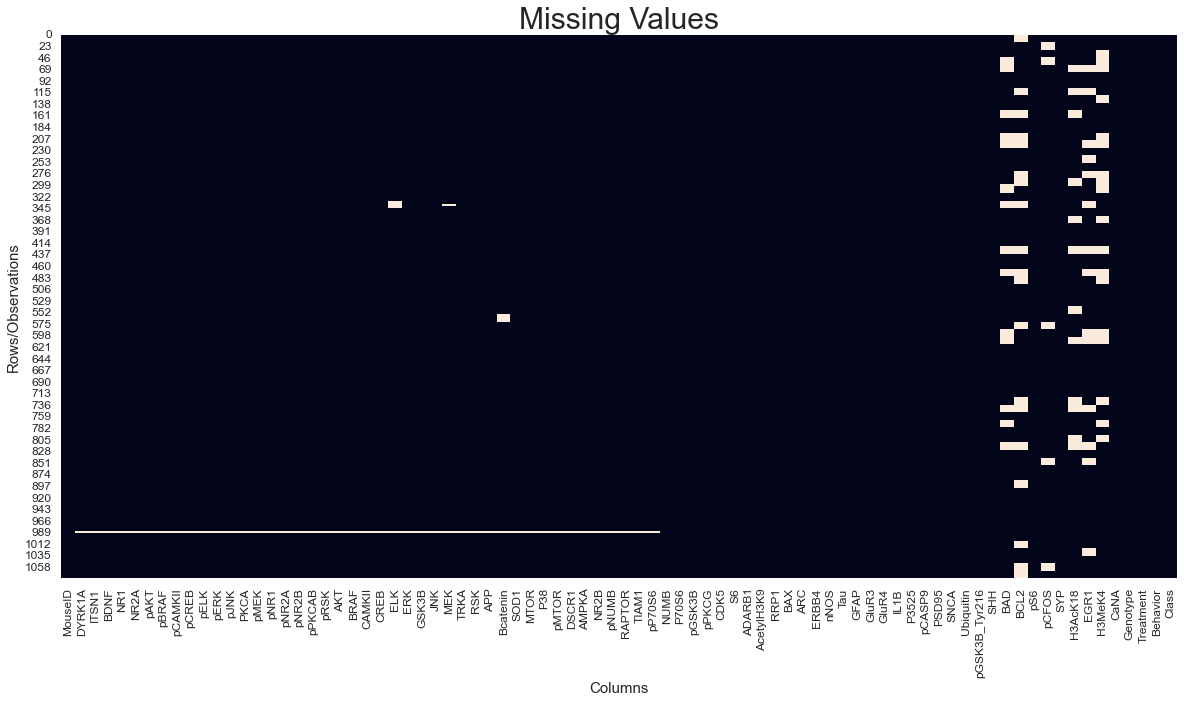

In [7]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(df.isnull(), cbar=False)
ax.set_title('Missing Values', fontsize=30)
ax.set_xlabel('Columns', fontsize=15)
ax.set_ylabel('Rows/Observations', fontsize=15)
ax.tick_params(labelsize=12)
plt.show()

In [8]:
protein_types = list(df.columns[1:78])

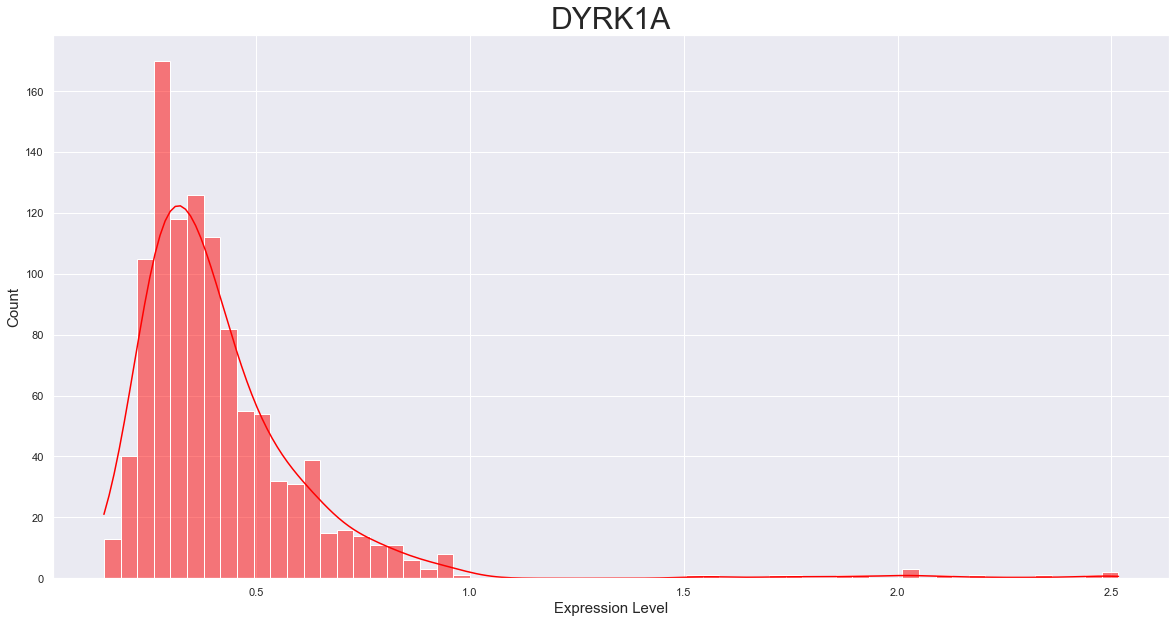

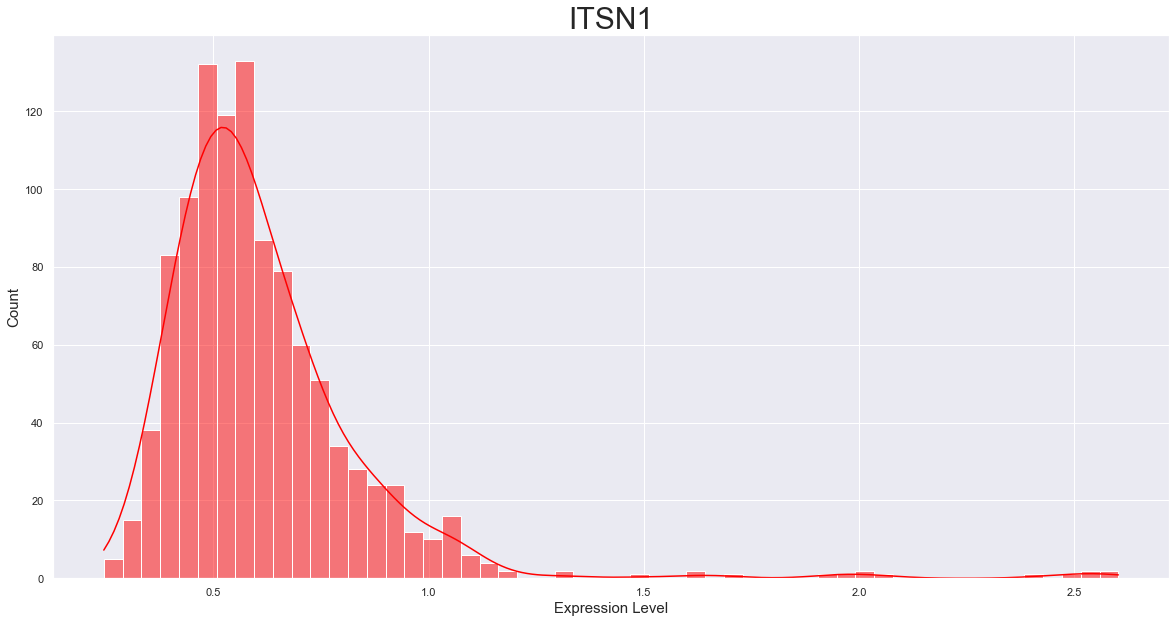

In [9]:
# Show for first two
for protein in protein_types[0:2]:
    fig, ax = plt.subplots(figsize=(20, 10))
    sns.histplot(x=protein, data=df, kde=True, color='red')
    ax.set_title(protein, fontsize=30)
    ax.set_xlabel("Expression Level", fontsize=15)
    ax.set_ylabel('Count', fontsize=15)
    ax.tick_params(left=False, bottom=False)
    plt.show()

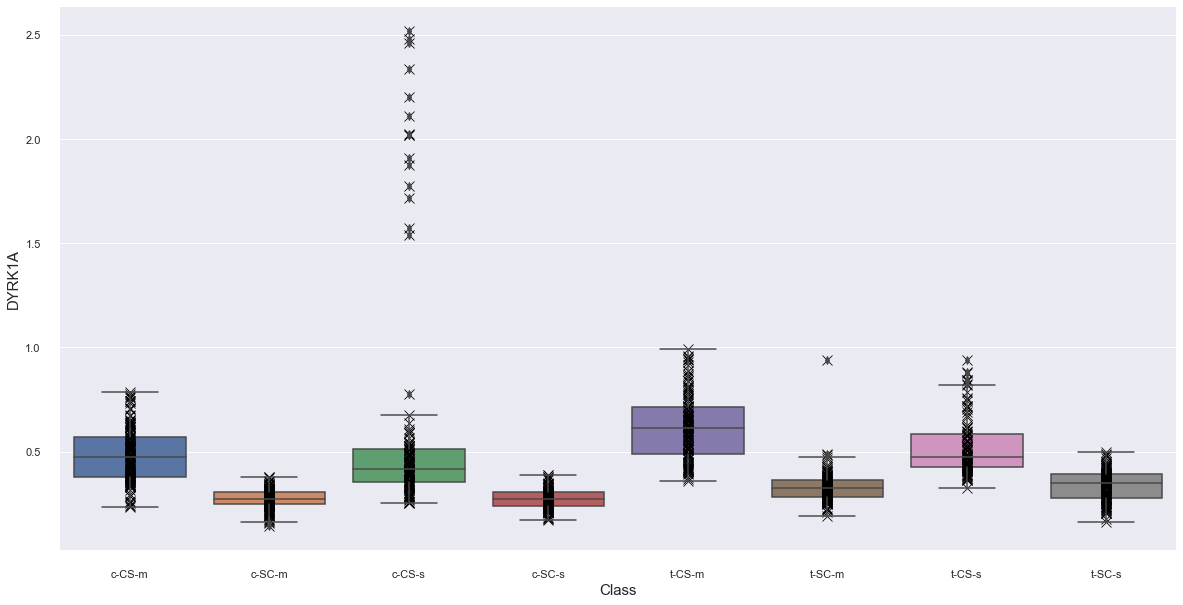

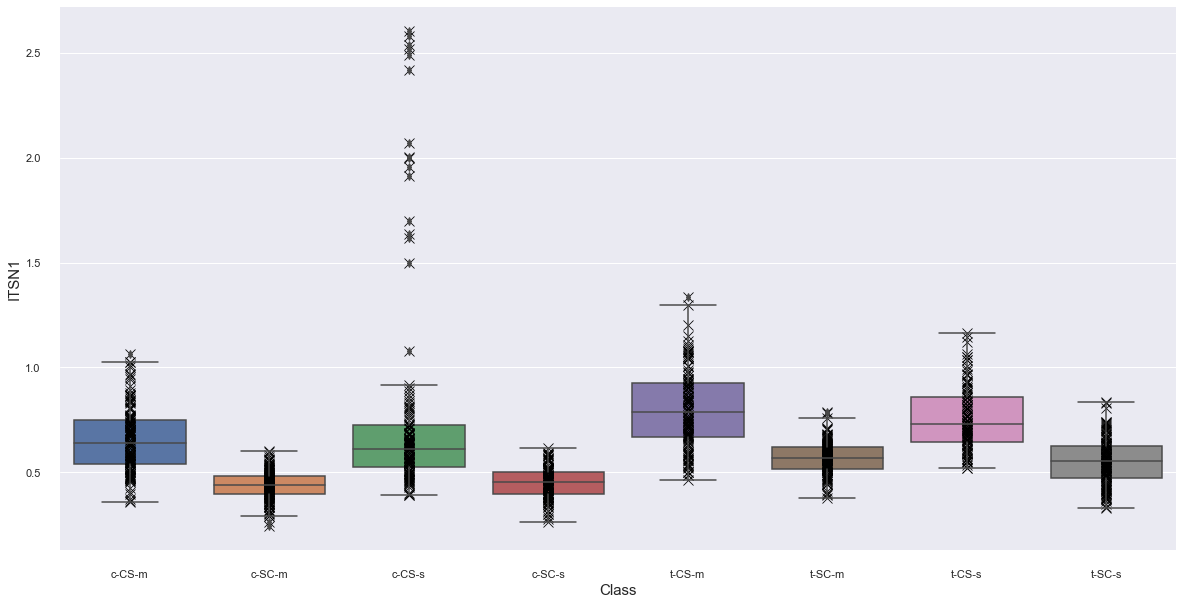

In [10]:
# Show for first two
for protein in protein_types[0:2]:
    fig, ax = plt.subplots(figsize=(20, 10))
    sns.boxplot(x='Class', y=protein, data=df)
    sns.scatterplot(x='Class', y=protein, data=df, color='black', marker='x', s=100)
    ax.set_xlabel("Class", fontsize=15)
    ax.set_ylabel(protein, fontsize=15)
    sns.despine(offset=10, trim=True)
    ax.tick_params(left=False, bottom=False)
    plt.show()

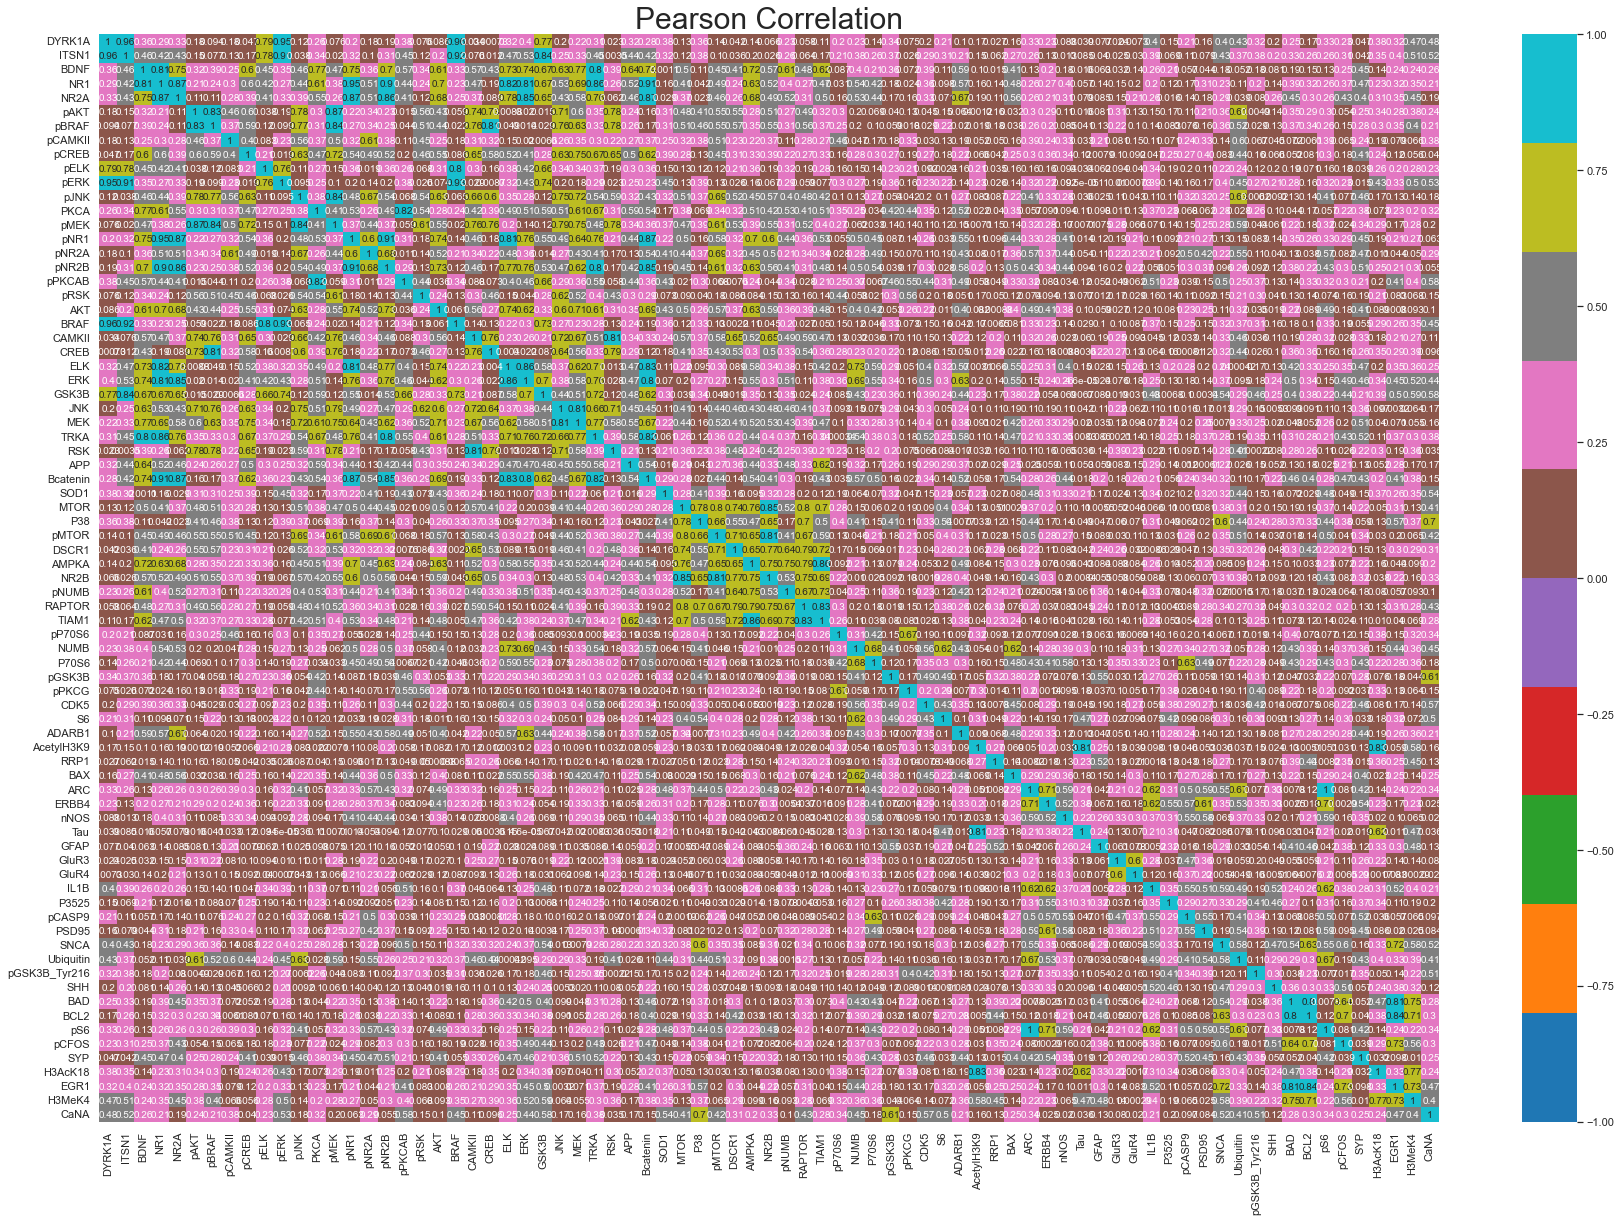

In [11]:
corr = df.corr(method='pearson').abs()

fig = plt.figure(figsize=(30,20))
sns.heatmap(corr, annot=True, cmap='tab10', vmin=-1, vmax=+1)
plt.title('Pearson Correlation', fontsize=30)
plt.show()

# Analysing of Variance with ANOVA

**Null Hypothesis**: there are no diferrences in expression level mean between classes.

$$H_0:μ_1=μ_2=μ_3=μ_4=μ_5=μ_6=μ_7=μ_8$$

**Alternate Hypothesis**: there is at least one significant difference among the groups.

$$H_A:μ_1≠μ_2≠μ_3≠μ_4≠μ_5≠μ_6≠μ_7≠μ_8$$

**Significance Level**:

$$α=0.01$$

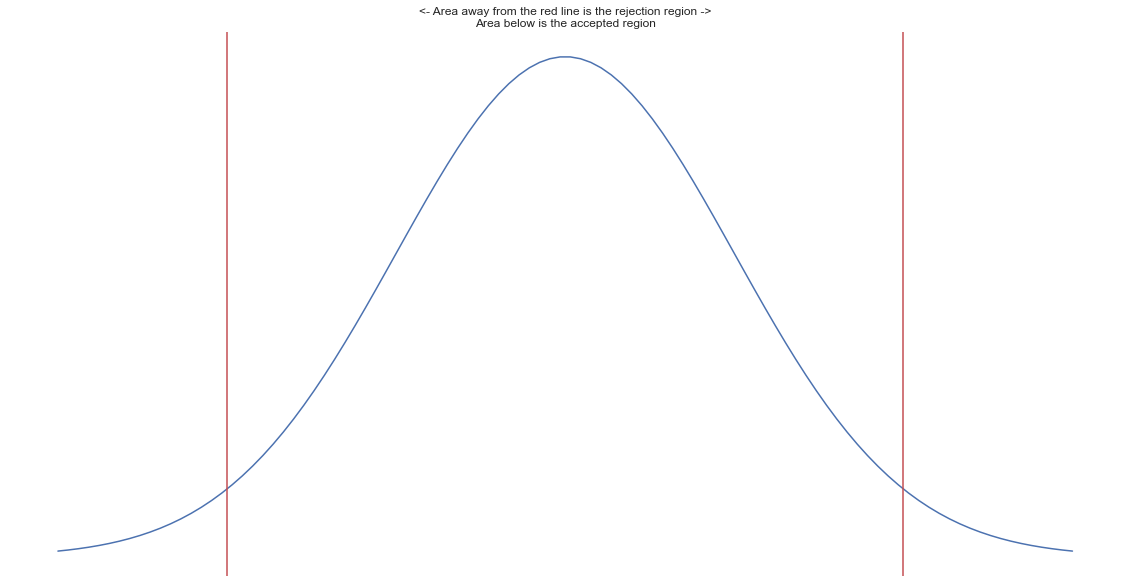

In [12]:
mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
ax = plt.subplots(figsize=(20, 10))
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.axvline(-2, color='r')
plt.axvline(2, color='r')
plt.title("<- Area away from the red line is the rejection region ->\nArea below is the accepted region")
plt.axis('off')
plt.show()

In [13]:
anova_cols = [
    "protein", "f_score", "p_value", "class_sum_sq", 
    "residual_sum_sq", "class_df", "residual_df", "var_expl",
    "total_variability", "var_expl_per"]
anova_df = pd.DataFrame(columns=anova_cols)
anova_df.head()

,protein,f_score,p_value,class_sum_sq,residual_sum_sq,class_df,residual_df,var_expl,total_variability,var_expl_per


In [14]:
for idx, protein in enumerate(protein_types):
    model = ols(f'{protein} ~ Class', data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)

    f_score = anova_table['F'][0]
    p_value = anova_table['PR(>F)'][0]
    class_sum_sq = anova_table['sum_sq'][0]
    residual_sum_sq = anova_table['sum_sq'][1]
    class_df = anova_table['df'][0]
    residual_df = anova_table['df'][1]

    var_expl= np.round(class_sum_sq/ (class_sum_sq + residual_sum_sq), 2)
    total_variability = np.round(class_sum_sq + residual_sum_sq, 2)
    var_expl_per = var_expl*100
    
    anova_df.loc[idx] = [
        protein, f_score, p_value, class_sum_sq, 
        residual_sum_sq, class_df, residual_df, 
        var_expl, total_variability, var_expl_per]

anova_df.head(20)

,protein,f_score,p_value,class_sum_sq,residual_sum_sq,class_df,residual_df,var_expl,total_variability,var_expl_per
0,DYRK1A,62.083729,5.925268e-75,19.338386,47.568788,7.0,1069.0,0.29,66.91,29.0
1,ITSN1,61.655789,1.699537e-74,19.596632,48.538599,7.0,1069.0,0.29,68.14,29.0
2,BDNF,18.816054,8.856634e-24,0.287844,2.336189,7.0,1069.0,0.11,2.62,11.0
3,NR1,15.519593,1.850255e-19,11.972118,117.806787,7.0,1069.0,0.09,129.78,9.0
4,NR2A,22.227637,3.409618e-28,119.033201,817.813886,7.0,1069.0,0.13,936.85,13.0
5,pAKT,36.119743,1.711486e-45,0.356766,1.508406,7.0,1069.0,0.19,1.87,19.0
6,pBRAF,28.812794,1.562119e-36,0.124893,0.661959,7.0,1069.0,0.16,0.79,16.0
7,pCAMKII,74.751012,4.076386e-88,593.153907,1211.797304,7.0,1069.0,0.33,1804.95,33.0
8,pCREB,18.890126,7.092208e-24,0.125779,1.016841,7.0,1069.0,0.11,1.14,11.0
9,pELK,17.881987,1.466560e-22,24.587429,209.979563,7.0,1069.0,0.10,234.57,10.0


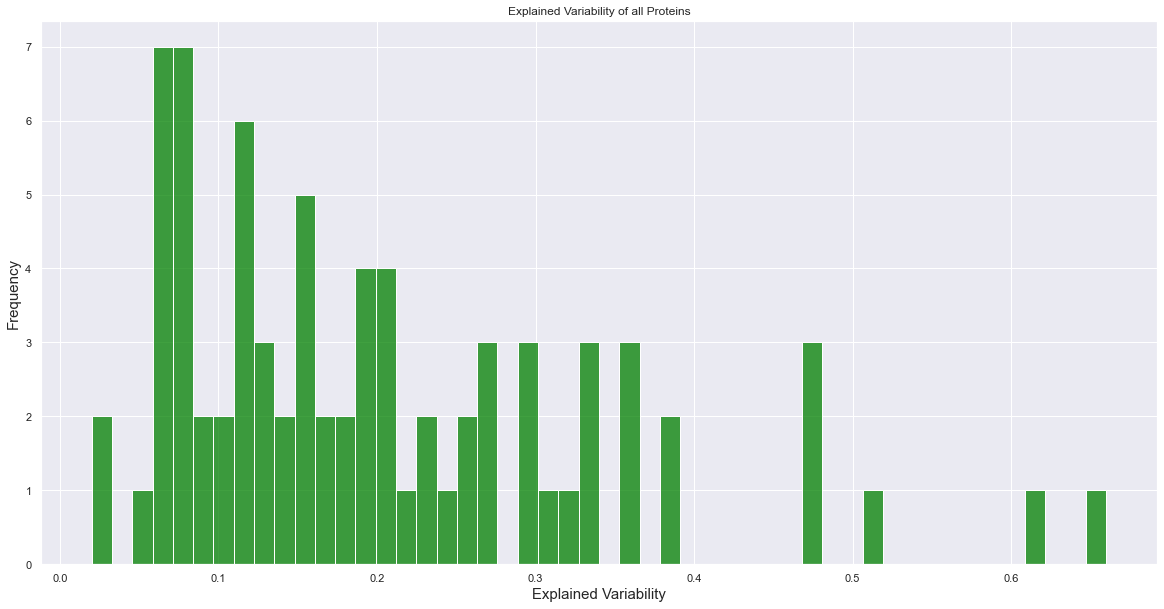

In [15]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.histplot(x='var_expl', data=anova_df, bins=50, color='green')
ax.set_title('Explained Variability of all Proteins', )
ax.set_xlabel("Explained Variability", fontsize=15)
ax.set_ylabel('Frequency', fontsize=15)
plt.show()

Number of Proteins with not significant mean differences among classes: 0

As we can see, ANOVA testing showed that there are no Proteins with not significant mean differences among classes (in other words, p value of each protein is much lower than significance level choosen, 

Therefore, we reject null hypothesis.

<br>

# Post-hoc Testing

So far we don’t know what classes are they, so we need to refer to post-hoc testing.

Histogram of R_sq distribution among Proteins shows that more than 50% of variability of Prorein Expression Level can not be identified by Class (R_sq < 0.2). We can use this information to build proper model.